# Impor Package

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset Titanic

In [5]:
df = pd.read_csv('titanic.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Melihat Missing Value

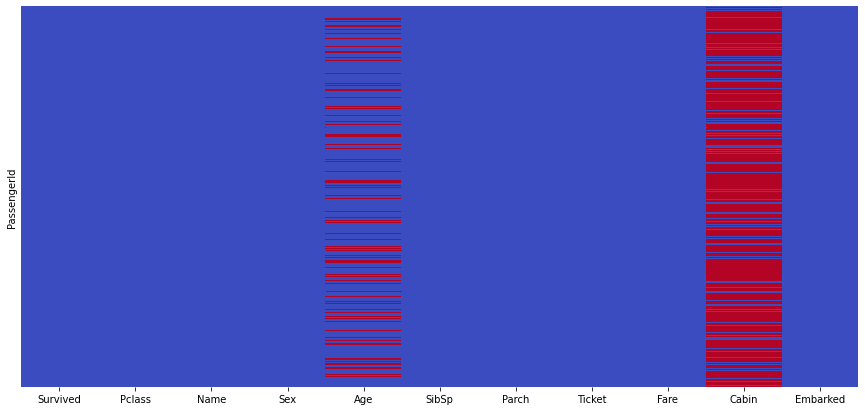

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Drop Columns Data yang tidak penting, Banyak Missing Value dan isi columns yang terdapat sedikit missing value

In [7]:
df.drop(columns=['Name', 'Ticket','Age', 'Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [8]:
df.fillna({'Embarked':'S'}, inplace=True)

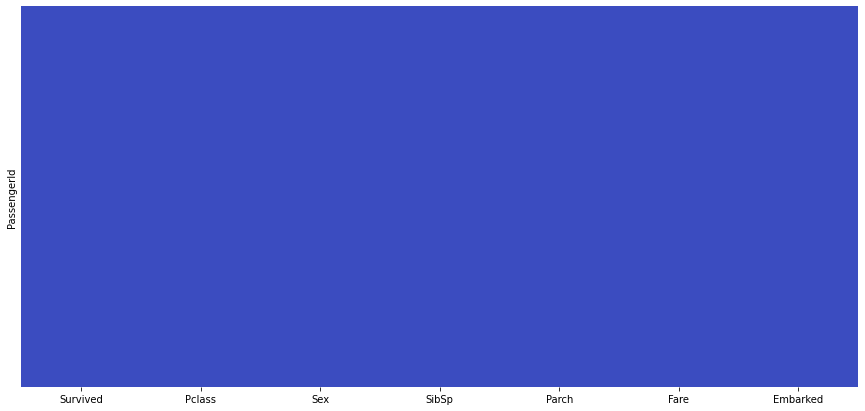

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Splitting Dataset

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Survived')
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


# Build Model


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Preprocessing

In [12]:
x_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [21]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="mean")),
  ('scaler', MinMaxScaler())
])

cat_pip = Pipeline([
  ('imputer',SimpleImputer(strategy="most_frequent")),
  ('Onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
  ('numeric', num_pip, ['SibSp', 'Parch', 'Fare']),
  ('categoric', cat_pip,['Pclass', 'Sex', 'Embarked'])
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', KNeighborsClassifier())
])

# Training Model

In [22]:
params = {
    'algo__n_neighbors':range(1,51,2),
    'algo__weights':['uniform', 'distance'],
    'algo__p': [1,2]
}
model = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('impu

## Evaluasi

In [15]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8188202247191011, 0.7877094972067039)